In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [6]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

# X_train, X_text = X_train/255, X_test/255

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='sigmoid'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 138s 73ms/step - loss: 0.3747 - accuracy: 0.9018 - val_loss: 0.1503 - val_accuracy: 0.9553
Epoch 2/3
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0843 - accuracy: 0.9737 - val_loss: 0.1389 - val_accuracy: 0.9651
Epoch 3/3
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.1536 - val_accuracy: 0.9643


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.1536 - accuracy: 0.9643


[0.15359993278980255, 0.9642999768257141]

In [15]:
import numpy as np

# y_pred = [np.argmax(i) for i in model.predict(X_test)]

y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = np.array(list(map(lambda x: 1 if x==max(y_pred[i]) else 0, y_pred[i])))

In [16]:
# for i, j in zip(y_test, y_pred):
#     print(i, j)

Text(69.0, 0.5, 'Actual')

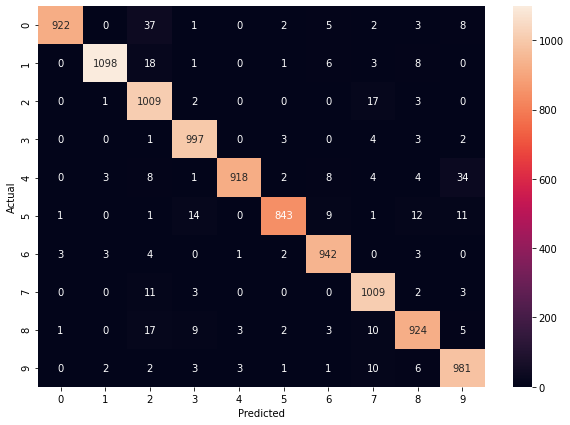

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sn.heatmap(tf.math.confusion_matrix(labels=y_test.argmax(axis=1), predictions=y_pred.argmax(axis=1)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')